In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings

# Mengabaikan semua peringatan
warnings.filterwarnings("ignore")

# Kode program Anda di sini


In [14]:
# Membaca dataset dari file CSV
df=pd.read_csv('https://raw.githubusercontent.com/omidiyanto/konversiMK-antenna/main/antenna.csv')
print("Shape of the Dataframe: ",df.shape)
df.head()

Shape of the Dataframe:  (572, 13)


,Wm,W0m,dm,tm,rows,Xa,Ya,gain,vswr,bandwidth,s,pr,p0
0,2142.9,162.86,77.143,214.29,3.0,0.0,2142.9,2.799175,1.372040,110.6698,-16.090654,0.204248,0.483952
1,2142.9,162.86,77.143,214.29,3.0,3543.5,6964.3,2.817305,1.638103,120.7497,-12.328015,0.197374,0.464289
2,2142.9,162.86,351.430,214.29,5.0,8365.0,6964.3,2.941413,1.242714,123.6901,-19.313586,0.212885,0.490808
3,2142.9,162.86,351.430,214.29,3.0,8365.0,2142.9,2.844078,1.242587,122.4301,-19.317644,0.212405,0.496603
4,2142.9,162.86,351.430,214.29,3.0,8365.0,6964.3,2.812315,1.271176,124.3198,-18.459992,0.207997,0.489240


In [15]:
#check the data types of the data features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Wm         572 non-null    float64
 1   W0m        572 non-null    float64
 2   dm         572 non-null    float64
 3   tm         572 non-null    float64
 4   rows       572 non-null    float64
 5   Xa         572 non-null    float64
 6   Ya         572 non-null    float64
 7   gain       572 non-null    float64
 8   vswr       572 non-null    float64
 9   bandwidth  509 non-null    float64
 10  s          572 non-null    float64
 11  pr         572 non-null    float64
 12  p0         572 non-null    float64
dtypes: float64(13)
memory usage: 58.2 KB


In [16]:
#summary statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wm,572.0,2244.048252,691.578895,2142.900000,2142.900000,2142.900000,2142.900000,6964.300000
W0m,572.0,400.594178,184.905214,162.860000,162.860000,325.710000,488.570000,651.430000
dm,572.0,275.425776,150.901130,77.143000,77.143000,214.290000,351.430000,488.570000
tm,572.0,224.404825,69.157890,214.290000,214.290000,214.290000,214.290000,696.430000
rows,572.0,4.097902,1.443942,3.000000,3.000000,3.000000,5.000000,7.000000
Xa,572.0,4063.246329,3287.862064,0.000000,1132.800000,3543.500000,5954.300000,10776.000000
Ya,572.0,6947.469755,5136.193313,2142.900000,2142.900000,6964.300000,11786.000000,16607.000000
gain,572.0,2.678568,0.683242,-5.654378,2.815006,2.876220,2.921877,3.238539
vswr,572.0,2.094927,1.914750,1.041183,1.187911,1.438023,1.725260,8.377999
bandwidth,509.0,118.036075,11.553491,32.759900,119.490100,122.220100,123.269800,124.740100


In [17]:
#removing for Null values
df.dropna(axis=0, inplace=True)
df.isnull().sum()

Wm           0
W0m          0
dm           0
tm           0
rows         0
Xa           0
Ya           0
gain         0
vswr         0
bandwidth    0
s            0
pr           0
p0           0
dtype: int64

In [18]:
# Memisahkan fitur dan target
X = df.drop(['p0'],axis = 1)
y = df['p0']
# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [19]:
# Inisialisasi model-model yang akan digunakan
models = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),
    GradientBoostingRegressor(),SVR(),KNeighborsRegressor()]

model_names = ['Linear Regression','Decision Tree','Random Forest','Gradient Boosting',
    'Support Vector Regression','K-Nearest Neighbors']
accuracies = []
table_data = []

# Melatih dan menguji setiap model
for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracies.append(r2)
    # Menyimpan hasil metrik dalam list
    table_data.append([model_name, mse, r2])

# Menyusun judul kolom tabel
headers = ["Model Name", "Mean Squared Error (MSE)", "R-squared (R2)"]
# Membuat DataFrame dari data dan judul kolom
df = pd.DataFrame(table_data, columns=headers)
df


,Model Name,Mean Squared Error (MSE),R-squared (R2)
0,Linear Regression,1.730661e-05,0.840547
1,Decision Tree,1.025750e-05,0.905493
2,Random Forest,9.442478e-07,0.991300
3,Gradient Boosting,3.240355e-06,0.970145
4,Support Vector Regression,6.928764e-03,-62.837637
5,K-Nearest Neighbors,1.065491e-05,0.901832


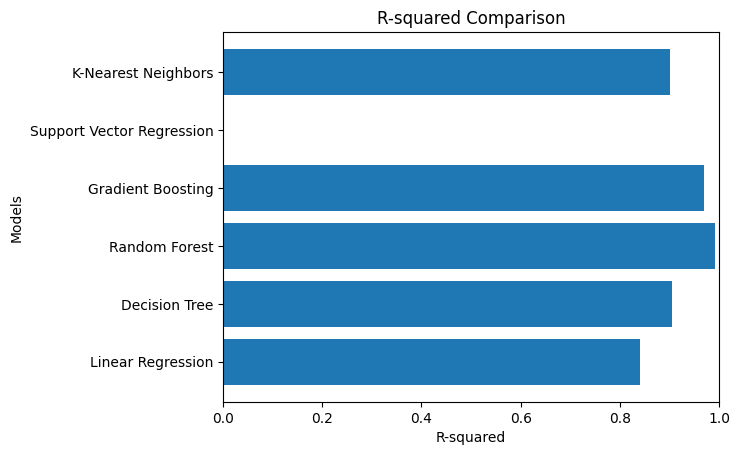

In [20]:
# Visualisasi perbandingan akurasi (R-squared)
plt.barh(model_names, accuracies)
plt.xlabel('R-squared')
plt.ylabel('Models')
plt.title('R-squared Comparison')
plt.xlim(0, 1)
plt.show()

In [21]:
# Membuat dan melatih best model
BestModel = RandomForestRegressor()
BestModel.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = BestModel.predict(X_test)

# Menghitung mean squared error dan R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Membuat DataFrame untuk hasil evaluasi
report_df = pd.DataFrame({'Metric': ['Mean Squared Error (MSE)', 'R-squared (R2)'],
                          'Value': [mse, r2]})
report_df

,Metric,Value
0,Mean Squared Error (MSE),0.000001
1,R-squared (R2),0.989489


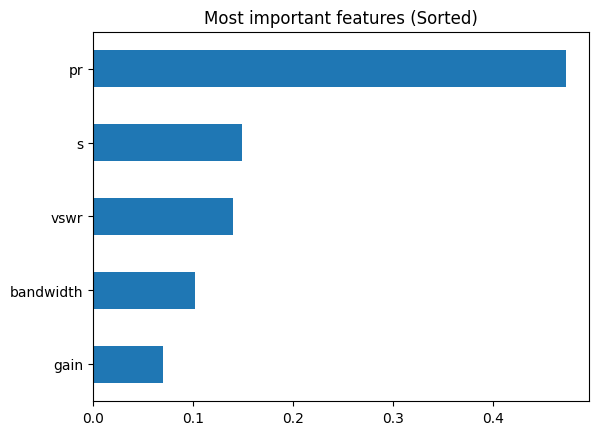

In [22]:
feature_importances=BestModel.feature_importances_
feature_importances_df=pd.DataFrame({'Variable':list(X_train), 'Variable importance':feature_importances})
feature_importances_df.sort_values('Variable importance')
feat_importances = pd.Series(BestModel.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Most important features (Sorted)")
plt.gca().invert_yaxis() # Invert the y-axis to show largest at the top
plt.show()

In [23]:
# Memasukkan nilai input untuk prediksi
Wm_input = float(input("Masukkan Wm = "))
W0m_input = float(input("Masukkan W0m = "))
dm_input = float(input("Masukkan dm = "))
tm_input = float(input("Masukkan tm = "))
rows_input = float(input("Masukkan rows = "))
Xa_input = float(input("Masukkan Xa = "))
Ya_input = float(input("Masukkan Ya = "))
gain_input = float(input("Masukkan gain = "))
vswr_input = float(input("Masukkan vswr = "))
bandwidth_input = float(input("Masukkan bandwidth = "))
s_input = float(input("Masukkan s = "))
pr_input = float(input("Masukkan pr = "))

input_data = [[Wm_input, W0m_input, dm_input, tm_input, rows_input, Xa_input, Ya_input, gain_input, 
               vswr_input, bandwidth_input, s_input, pr_input]]

# Melakukan prediksi 
predicted_p0_value = BestModel.predict(input_data)
print("Hasil Prediksi Efisiensi Antenna:", predicted_p0_value)

Masukkan Wm = 2142.9
Masukkan W0m = 162.86
Masukkan dm = 77.143
Masukkan tm = 214.29
Masukkan rows = 3.0
Masukkan Xa = 0.0
Masukkan Ya = 2142.9
Masukkan gain = 2.799175
Masukkan vswr = 1.372040
Masukkan bandwidth = 110.6698
Masukkan s = 16.090654
Masukkan pr = 0.204248
Hasil Prediksi Efisiensi Antenna: [0.4499667]
